In [1]:
#import libraries
import pandas as pd
import numpy as np
import string
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#reading in data
train = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [3]:
#check first few rows
train.head(7)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...


In [4]:
#data Cleaning tasks
#1. remove @user handles
#2. remomve words with less than or equal to 3 letters
#3. remove special character and punctuations
#4. do stemming or lemmatizations

In [5]:
#1. remove @user handle

In [6]:
#combine both train and test to ease our task
combi = train.append(test, ignore_index = True)

In [7]:
#function that removes a pattern form an input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'', input_txt)
        
    return input_txt

In [8]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")

In [9]:
#remove special character, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

In [10]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


In [11]:
#remove short words
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [12]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [13]:
#Tokenization
tokenized_tweet = combi['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [14]:
#Stemming
from nltk import PorterStemmer
ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(w) for w in x])
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [15]:
#visualizing the data


In [16]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


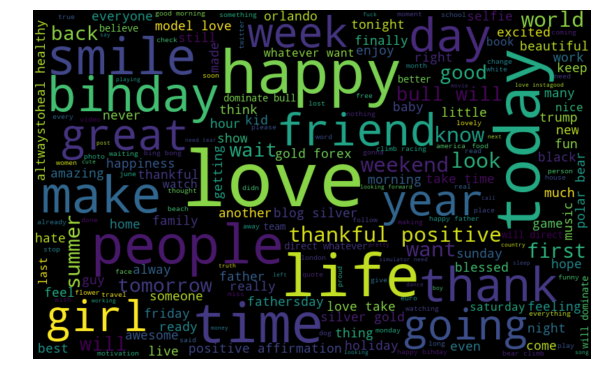

In [17]:
#most common words
all_words = ' '.join([w for w in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,max_font_size=110).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

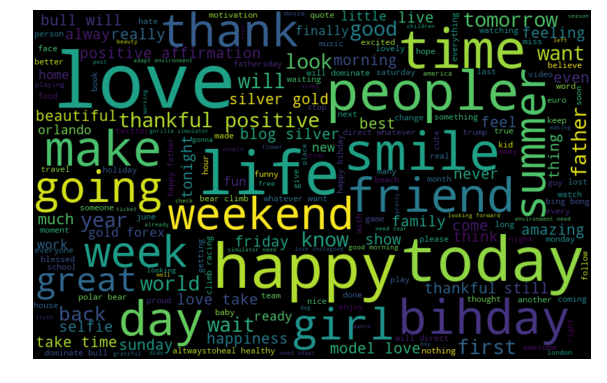

In [18]:
#words in non-racist/non-sexist tweets
normal_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])
wordcloud = WordCloud(width=800,height=500,max_font_size=110).generate(normal_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()


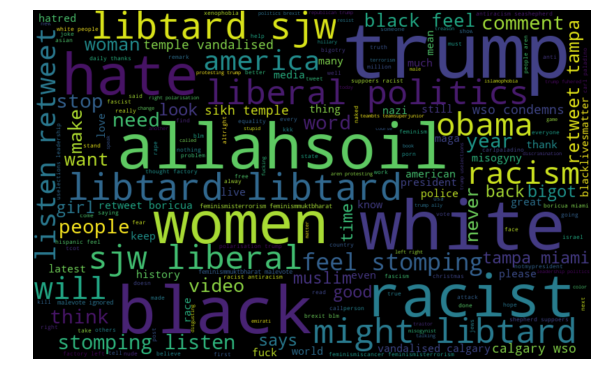

In [19]:
#words in racist/sexist tweets
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud = WordCloud(width=800,height=500,max_font_size=110).generate(negative_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()


In [20]:
#find trending hashtags
def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    
    return hashtags

In [21]:
#hashtags from regular tweets:
ht_regular = hashtag_extract(combi['tidy_tweet'][combi['label']==0])

In [22]:
#hashtags from sexist tweets
ht_negative = hashtag_extract(combi['tidy_tweet'][combi['label']==1])

In [23]:
#unnesting list .... //?????
ht_regular = sum(ht_regular,[])
ht_negative = sum(ht_negative,[])

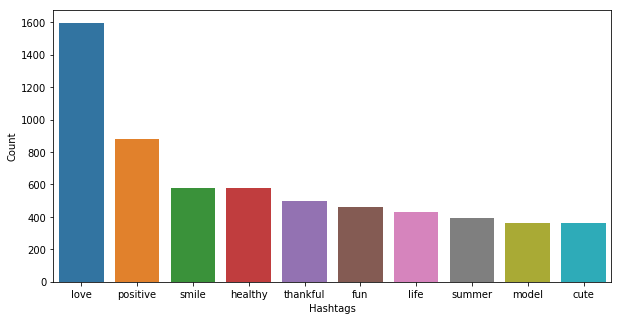

In [24]:
#plot the top hashtags for regular tweets
a = nltk.FreqDist(ht_regular)
d = pd.DataFrame({
                'Hashtags':list(a.keys()),
                'Count':list(a.values())
                 })
#selecting top 10 most freq hashtags
d = d.nlargest(columns = "Count", n= 10)
plt.figure(figsize = (10,5))
ax = sns.barplot(data = d,x = "Hashtags", y = "Count")

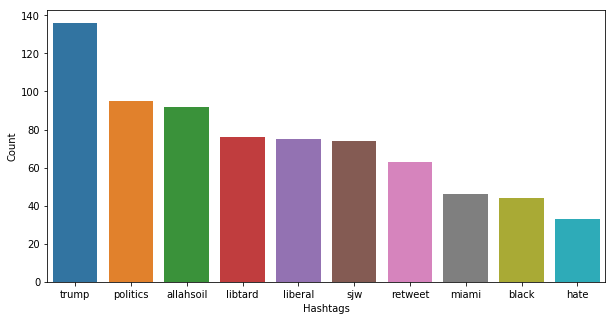

In [25]:
#plot the top hashtags for racist tweets
a = nltk.FreqDist(ht_negative)
d = pd.DataFrame({
                'Hashtags':list(a.keys()),
                'Count':list(a.values())
                 })
#selecting top 10 most freq hashtags
d = d.nlargest(columns = "Count", n= 10)
plt.figure(figsize = (10,5))
ax = sns.barplot(data = d,x = "Hashtags", y = "Count")

In [26]:
#Extracting Features

In [27]:
#1. Using Count Vectoriser

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
countvect = CountVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')
countvectmodel = countvect.fit_transform(combi['tidy_tweet'])

In [29]:
#2. Using tf-idf method

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfvect = TfidfVectorizer(max_df=0.9, min_df=2, max_features=1000, stop_words='english')
tfidfmodel = tfidfvect.fit_transform(combi['tidy_tweet'])

In [31]:
#Build Model #A, using count vect

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [36]:
countvectmodel

<49159x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 163536 stored elements in Compressed Sparse Row format>

In [39]:
traincountvect = countvectmodel[:31962,:]
testcountvect = countvectmodel[31962:,:]

In [40]:
traincountvect

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 106521 stored elements in Compressed Sparse Row format>

In [35]:
X_train, X_test, y_train, y_test = train_test_split(traincountvect, train['label'], random_state= 121, test_size = 0.3)

In [37]:
#training model
lreg = LogisticRegression()
lreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
y_pred = lreg.predict_proba(X_test)
pred_int = y_pred[:,1] >= 0.3 #........if prediction >0.3, then 1, else 0
pred_int = pred_int.astype(np.int)

In [39]:
f1_score(y_test,pred_int)

0.5211009174311927

In [40]:
#testing on actual test data

In [41]:
test_pred = lreg.predict_proba(testcountvect)
test_pred_int = test_pred[:,1]>=0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('submission1cv.csv', index=False)

In [42]:
#Build Model #A, using tfidf

In [43]:
train_tfidf = tfidfmodel[:31962,:]
test_tfidf = tfidfmodel[31962:,:]

In [44]:
X_train_tfidf = train_tfidf[y_train.index]
X_test_tfidf = train_tfidf[y_test.index]

In [45]:
lreg.fit(X_train_tfidf, y_train)

prediction = lreg.predict_proba(X_test_tfidf)
prediction_int = prediction[:,1]>=0.3
prediction_int = prediction_int.astype(np.int)

f1_score(y_test,prediction_int) 

0.5199240986717267

In [46]:
test_pred = lreg.predict_proba(test_tfidf)
test_pred_int = test_pred[:,1]>=0.3
test_pred_int = test_pred_int.astype(np.int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('submission1tfidf.csv', index=False)